# TimeDepBurgers2D
Notebook to implement and test the time-dependent 2D Burgers' equation.  
Author: Alejandro Diaz  
Date: 1/2/2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from time import time
from utils.Burgers2D_probgen import Burgers2D
from IPython.display import HTML, Image
import sys, os
import dill as pickle

In [3]:
plt.rc('font', size=20)
plt.rcParams['text.usetex'] = True

In [4]:
# make directories for figures and data
data_dir = './data/'
fig_dir0 = './figures/'
for d in [data_dir, fig_dir0]:
    if not os.path.exists(d): os.mkdir(d)

In [51]:
# parameters for physical domain and FD discretization
x_lim = [0, 1]
y_lim = [0, 1]
t_lim = [0, 2]
nx, ny, nt = 32, 32, 100
viscosity = 1

In [52]:
# initialize model
print('Initializing Burgers model...')
sys.stdout.flush()
mdl = Burgers2D(nx, ny, nt, x_lim, y_lim, t_lim, viscosity)
print('Done!')

Initializing Burgers model...
Done!


In [53]:
# parameterized initial conditions
def u0(XY, mu):
    val = np.zeros(len(XY))
    for i, xy in enumerate(XY):
        if np.all([xy[0] >= 0.0, xy[0] <= 0.5, xy[1] >= 0.0, xy[1] <= 0.5]):
            val[i] = mu*np.sin(2*np.pi*xy[0])*np.sin(2*np.pi*xy[1])
    return val 

def v0(XY, mu):
    val = np.zeros(len(XY))
    for i, xy in enumerate(XY):
        if np.all([xy[0] >= 0.0, xy[0] <= 0.5, xy[1] >= 0.0, xy[1] <= 0.5]):
            val[i] = mu*np.sin(2*np.pi*xy[0])*np.sin(2*np.pi*xy[1])
    return val 

mu = 1.0

In [54]:
# make figure directory
fig_dir1 = fig_dir0 + f'nx_{nx}_ny_{ny}_nt_{nt}_visc_{viscosity}/'
if not os.path.exists(fig_dir1): os.mkdir(fig_dir1)

In [55]:
# make figure directories
fig_dir2 = fig_dir1 + f'mu_{mu}/'
fom_figs = fig_dir2 + 'fom/'
for d in [fig_dir1, fig_dir2, fom_figs]:
    if not os.path.exists(d): os.mkdir(d)

In [56]:
# set initial condition
mdl.set_initial(lambda xy: u0(xy, mu), lambda xy: v0(xy, mu))

# solve Burgers equation
print('Solve Burgers equation with backward Euler:')
sys.stdout.flush()
uu, vv, res_hist, step_hist, runtime = mdl.solve(tol=1e-5, maxit=15, print_hist=False)
print('Done!') 
sys.stdout.flush()

Solve Burgers equation with backward Euler:
Done!


In [57]:
# frame updater for animation
X, Y = np.meshgrid(mdl.xx, mdl.yy)
def update_frame(Z, i):
        plt.clf()
        plt.pcolormesh(X, Y, Z[i], cmap='viridis', shading='auto', vmin=Z.min(), vmax=Z.max()) 
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        cb = plt.colorbar(orientation='vertical', label='$u(x,y)$')
        return plt

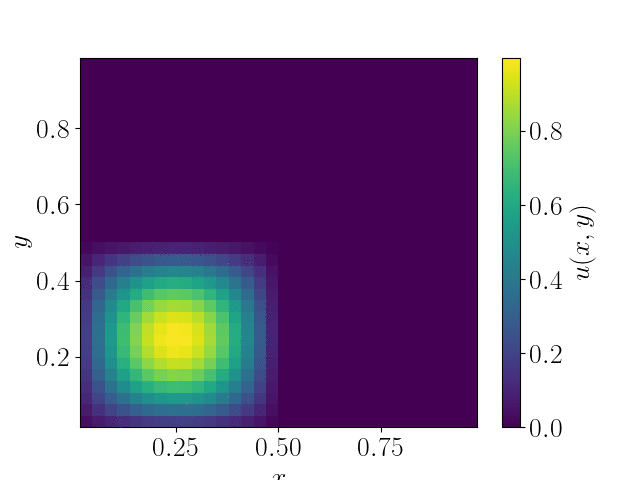

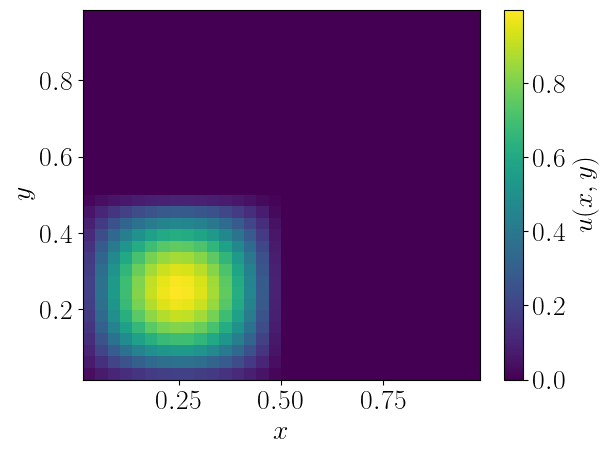

In [62]:
# save gifs of u solution
UU = uu.reshape(mdl.nt+1, mdl.ny, mdl.nx)
fig = plt.figure()
ani = animation.FuncAnimation(fig, lambda i: update_frame(UU, i), frames=mdl.nt+1, interval=1)
filename = fom_figs + 'u_state.gif'
ani.save(filename, writer='imagemagick', fps=24)
Image(filename)

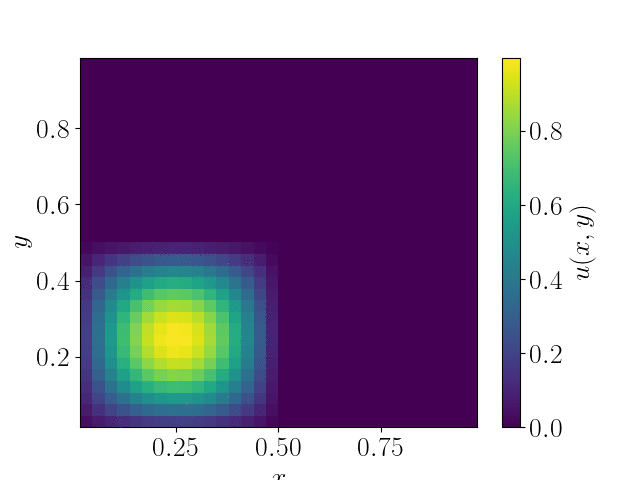

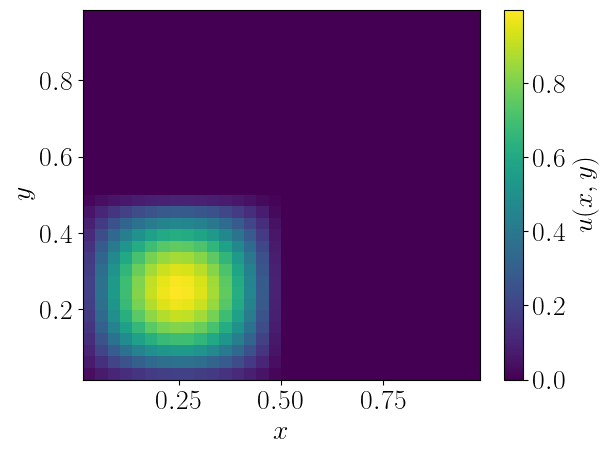

In [63]:
# save gifs of v solution
VV = vv.reshape(mdl.nt+1, mdl.ny, mdl.nx)
fig = plt.figure()
ani = animation.FuncAnimation(fig, lambda i: update_frame(VV, i), frames=mdl.nt+1, interval=1)
filename = fom_figs + 'v_state.gif'
ani.save(filename, writer='imagemagick', fps=24)
Image(filename)
# HTML(ani.to_jshtml())

## Reorganize data

In [20]:
# load snapshot and residual data
file = data_dir + f'nx_{nx}_ny_{ny}_nt_{nt}_visc_{viscosity}/snapshots.p'
data = pickle.load(open(file, 'rb'))
parameters = data['parameters']
snapshots  = data['snapshots']

In [33]:
for i, mu in enumerate(parameters):
    newfile = data_dir + f'nx_{nx}_ny_{ny}_nt_{nt}_visc_{viscosity}/mu_{mu}_uv_state.p'
    uv = snapshots[i]
    u = uv[:nt+1]
    v = uv[nt+1:]
    uv = np.hstack((u,v))
    pickle.dump(uv, open(newfile, 'wb'))

In [34]:
uv = pickle.load(open(newfile, 'rb'))

In [35]:
uv.shape

(1501, 7200)